In [1]:
# Import packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from collections import Counter
from parser_final import RobustFrailMCIpreprocess

In [2]:
# Function to show classification report for Cross Validation
def classification_report_with_accuracy_score(y_true, y_pred):
    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

In [3]:
# Conduct High Correlation Filter

# Conduct mapping for Feature Names
featureName_mapping = {
    "A1_1" : "Vitamin B12 (pmol/L)",
    "A1_2" : "Serum Folate (nmol/L)",
    "A2_1" : "Serum Homocysteine (µmol/L)",
    "A3_1" : "25-hydroxy Vitamin D (nmol/L)",
    "B1_a" : "Haemoglobin (g/L)",
    "B1_a1" : "RBC (/L)",
    "B1_a2" : "PCV (L/L)",
    "B1_a3" : "MCV (fL)",
    "B1_a4" : "MCH (pg)",
    "B1_a5" : "MCHC (g/L)",
    "B1_a6" : "RDW (%)",
    "B1_b" : "White Cell Count (/L)",
    "B1_b1" : "Neutrophils (/L)",
    "B1_b2" : "Lymphocytes (/L)",
    "B1_b3" : "Monocytes (/L)",
    "B1_b4" : "Eosinophils (/L)",
    "B1_b5" : "Basophils (/L)",
    "B1_c" : "Platelets (/L)",
    "B1_d" : "Glucose (mmol/L)",
    "B2_a1" : "Total Cholesterol (mmol/L)",
    "B2_a2" : "Triglyceride (mmol/L)",
    "B2_a3" : "HDL Cholesterol (mmol/L)",
    "B2_a4" : "LDL Cholesterol (mmol/L)",
    "B2_a5" : "Total Cholesterol/HDL Ratio",
    "B2_b1" : "Sodium (mmol/L)",
    "B2_b2" : "Potassium (mmol/L)",
    "B2_b3" : "Chloride (mmol/L)",
    "B2_c1" : 'Urea (mmol/L)',
    "B2_c2" : "Creatinine (umol/L)",
    "B2_c3" : "eGFR (mL/min/1.73m2)",
    "B2_c4" : "Uric Acid (mmol/L)",
    "B2_c5" : "Calcium (mmol/L)",
    "B2_c6" : "Corrected Calcium (mmol/L)",
    "B2_c7" : "Phosphate (mmol/L)",
    "B2_d1" : "Total Protein (g/L)",
    "B2_d2" : "Albumin (g/L)",
    "B2_d3" : "Globulin (g/L)",
    "B2_d4" : "Albumin/Globulin ratio",
    "B2_d5" : "Alkaline Phosphatase (U/L)",
    "B2_d6" : "Total Bilirubin (µmol/L)",
    "B2_d7" : "GGT",
    "B2_d8" : "AST",
    "B2_d9" : "ALT",
    "B3" : "C-Reactive Protein",
    "B4_a1" : "Protein",
    "B4_a2" : "pH",
    "B4_a3" : "Glucose",
    "B4_a4" : "Ketones",
    "B4_a5" : "S.G.",
    "B4_a6" : "Blood",
    "B4_b1" : "Leucocytes (/L)",
    "B4_b2" : "Erythrocytes (/L)",
    "B4_b3" : "Epithelial Cells",
    "B5_a1" : "Free Thyroxine (FT4) (pmol/L)",
    "B5_a2" : "Thyroid Stimulating Hormone (mIU/L)",
    "B5_a3" : "Free Tri-iodothyronine (FT3) (pmol/L)",
    "B6" : "HbA1c"
}

In [4]:
# Pre-parse the dataset
data = RobustFrailMCIpreprocess("rawfile_final.csv")

robust       368
frail_mci     86
Name: condition, dtype: int64

####################################################################
Number of Rows of Dataframe:
454
Number of Columns of Dataframe:
59

####################################################################
Threshold for number of NULLs in a column: 0.1095
Number of Columns before Parsing for Too Many NULLs in a column:
59
Number of Columns after Parsing for Too Many NULLs in a column:
51

Columns Removed:
B1_b5
B4_a1
B4_a3
B4_a4
B4_a6
B4_b1
B4_b3
B5_a1

####################################################################
Number of Columns after dropping B1_b4, B2_c3, B4_b2 for inconsistent data types:
48

####################################################################
Number of Rows before Parsing NULLs in data:
454
Number of Rows after Parsing NULLs in data:
419


In [5]:
# Taking only Frail+MCI and Robust classes

df1 = data[data.condition == 'frail_mci']
df1 = df1.reset_index(drop=True)

df2 = data[data.condition == 'robust']
df2 = df2.reset_index(drop=True)

data = pd.concat([df1, df2], ignore_index=True)

In [6]:
data.head()

,mtag,condition,A1_1,A1_2,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
0,ME01378,frail_mci,241,13.0,20,33.5,150,5.25,0.46,87,...,10,21,22,17,1.3,7.0,1.010,0.69,4.7,5.9
1,ME02832,frail_mci,444,43.8,16,87.0,134,4.65,0.40,85,...,10,14,20,15,13.4,6.0,1.005,1.29,4.5,5.8
2,ME02909,frail_mci,1476,54.5,16,57.0,119,3.80,0.36,94,...,18,17,35,21,0.2,7.5,1.012,1.90,4.1,5.8
3,ME02998,frail_mci,339,25.9,18,63.8,135,4.89,0.42,86,...,13,16,25,13,16.8,5.0,1.017,1.32,4.0,6.0
4,ME03061,frail_mci,287,23.8,20,95.5,146,5.18,0.44,85,...,18,22,25,24,1.4,7.5,1.006,2.94,4.6,6.1


In [7]:
data.tail()

,mtag,condition,A1_1,A1_2,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
414,MV00454,robust,220,24.6,19,67.5,138,4.66,0.42,91,...,20,10,17,8,6.6,7.0,1.015,1.29,4.5,6.2
415,MV00456,robust,334,20.1,18,51.0,139,4.63,0.42,91,...,16,22,35,40,1.0,6.0,1.015,1.88,3.9,5.6
416,MV00460,robust,418,54.4,17,61.0,122,4.18,0.38,90,...,19,20,23,15,0.4,6.5,1.005,3.58,4.0,5.6
417,MV00502,robust,393,38.2,18,43.1,136,4.57,0.43,94,...,13,11,22,23,0.7,7.0,1.009,0.92,4.1,6.0
418,MV00510,robust,371,23.2,24,55.9,127,4.41,0.40,90,...,13,14,16,12,7.5,8.0,1.017,2.45,4.5,6.2


In [8]:
c = data['condition'].value_counts()
condition = c.index
c

robust       343
frail_mci     76
Name: condition, dtype: int64

In [9]:
for i in range(len(condition)):
    data['condition'].replace(condition[i], i, inplace = True)

data.head()

,mtag,condition,A1_1,A1_2,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
0,ME01378,1,241,13.0,20,33.5,150,5.25,0.46,87,...,10,21,22,17,1.3,7.0,1.010,0.69,4.7,5.9
1,ME02832,1,444,43.8,16,87.0,134,4.65,0.40,85,...,10,14,20,15,13.4,6.0,1.005,1.29,4.5,5.8
2,ME02909,1,1476,54.5,16,57.0,119,3.80,0.36,94,...,18,17,35,21,0.2,7.5,1.012,1.90,4.1,5.8
3,ME02998,1,339,25.9,18,63.8,135,4.89,0.42,86,...,13,16,25,13,16.8,5.0,1.017,1.32,4.0,6.0
4,ME03061,1,287,23.8,20,95.5,146,5.18,0.44,85,...,18,22,25,24,1.4,7.5,1.006,2.94,4.6,6.1


In [10]:
data.tail()

,mtag,condition,A1_1,A1_2,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
414,MV00454,0,220,24.6,19,67.5,138,4.66,0.42,91,...,20,10,17,8,6.6,7.0,1.015,1.29,4.5,6.2
415,MV00456,0,334,20.1,18,51.0,139,4.63,0.42,91,...,16,22,35,40,1.0,6.0,1.015,1.88,3.9,5.6
416,MV00460,0,418,54.4,17,61.0,122,4.18,0.38,90,...,19,20,23,15,0.4,6.5,1.005,3.58,4.0,5.6
417,MV00502,0,393,38.2,18,43.1,136,4.57,0.43,94,...,13,11,22,23,0.7,7.0,1.009,0.92,4.1,6.0
418,MV00510,0,371,23.2,24,55.9,127,4.41,0.40,90,...,13,14,16,12,7.5,8.0,1.017,2.45,4.5,6.2


In [11]:
y = data['condition']

features = ['A1_1', 'A1_2', 'A2_1', 'A3_1', 'B1_a', 'B1_a1', 'B1_a2',
       'B1_a3', 'B1_a4', 'B1_a5', 'B1_a6', 'B1_b', 'B1_b1', 'B1_b2', 'B1_b3',
       'B1_c', 'B1_d', 'B2_a1', 'B2_a2', 'B2_a3', 'B2_a4', 'B2_a5', 'B2_b1',
       'B2_b2', 'B2_b3', 'B2_c1', 'B2_c2', 'B2_c4', 'B2_c5', 'B2_c6', 'B2_c7',
       'B2_d1', 'B2_d2', 'B2_d3', 'B2_d4', 'B2_d5', 'B2_d6', 'B2_d7', 'B2_d8',
       'B2_d9', 'B3', 'B4_a2', 'B4_a5', 'B5_a2', 'B5_a3', 'B6']
X = data[features]

X = StandardScaler().fit_transform(X)
X = MinMaxScaler().fit_transform(X)

In [12]:
sampling_strategy = {0: 76, 1: 76}
undersample = RandomUnderSampler(sampling_strategy=sampling_strategy)

X, y = undersample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({0: 76, 1: 76})


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

counter = Counter(y_train)
print(counter)

counter = Counter(y_test)
print(counter)

Counter({0: 46, 1: 45})
Counter({1: 31, 0: 30})


In [14]:
num = 46

numList = []
log_cv = []
lda_cv = []
knn_cv = []
cart_cv = []
gnb_cv = []
svm_cv = []
rfc_cv = []

log_test = []
lda_test = []
knn_test = []
cart_test = []
gnb_test = []
svm_test = []
rfc_test = []

while num < 101:
    numList.append(num)
    # Transform the dataset using SMOTE
    sampling_strategy = {0: num, 1: num}
    oversample = SMOTE(sampling_strategy=sampling_strategy)
    X_train, y_train = oversample.fit_resample(X_train, y_train)
    
    # Logistic Regression

    log_model = LogisticRegression()
    log_model.fit(X_train, y_train)
    scores = cross_val_score(log_model, X_train, y_train, cv=5)
    log_cv.append(scores.mean())

    # Linear Discriminant Analysis

    lda_model = LinearDiscriminantAnalysis()
    lda_model.fit(X_train, y_train)
    scores = cross_val_score(lda_model, X_train, y_train, cv=5)
    lda_cv.append(scores.mean())

    # K-Nearest Neigbors

    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train, y_train)
    scores = cross_val_score(knn_model, X_train, y_train, cv=5)
    knn_cv.append(scores.mean())

    # Classification and Regression Trees

    cart_model = DecisionTreeClassifier()
    cart_model.fit(X_train, y_train)
    scores = cross_val_score(cart_model, X_train, y_train, cv=5)
    cart_cv.append(scores.mean())

    # Gaussian Naive Bayes

    gnb_model = GaussianNB()
    gnb_model.fit(X_train, y_train)
    scores = cross_val_score(gnb_model, X_train, y_train, cv=5)
    gnb_cv.append(scores.mean())

    # Support Vector Machines

    svm_model = SVC(kernel='linear', gamma = 'auto', probability=True)
    svm_model.fit(X_train, y_train)
    scores = cross_val_score(svm_model, X_train, y_train, cv=5)
    svm_cv.append(scores.mean())

    # Random Forest Classifier

    rfc_model = RandomForestClassifier()
    rfc_model.fit(X_train, y_train)
    scores = cross_val_score(rfc_model, X_train, y_train, cv=5)
    rfc_cv.append(scores.mean())

    log_test.append(log_model.score(X_test, y_test).round(3))
    lda_test.append(lda_model.score(X_test, y_test).round(3))
    knn_test.append(knn_model.score(X_test, y_test).round(3))
    cart_test.append(cart_model.score(X_test, y_test).round(3))
    gnb_test.append(gnb_model.score(X_test, y_test).round(3))
    svm_test.append(svm_model.score(X_test, y_test).round(3))
    rfc_test.append(rfc_model.score(X_test, y_test).round(3))
    
    num = num + 1

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (47) in class 0 will be larger than the number of samples in the majority class (class #0 -> 46)
  n_samples_majority,
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (47) in class 1 will be larger than the number of samples in the majority class (class #0 -> 46)
  n_samples_majority,
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (48) in class 0 will be larger than the number of samples in the majority class (class #0 -> 47)
  n_samples_majority,
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (48) in class 1 will be larger than the number of samples in the majori

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (63) in class 0 will be larger than the number of samples in the majority class (class #0 -> 62)
  n_samples_majority,
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (63) in class 1 will be larger than the number of samples in the majority class (class #0 -> 62)
  n_samples_majority,
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (64) in class 0 will be larger than the number of samples in the majority class (class #0 -> 63)
  n_samples_majority,
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (64) in class 1 will be larger than the number of samples in the majori

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (79) in class 0 will be larger than the number of samples in the majority class (class #0 -> 78)
  n_samples_majority,
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (79) in class 1 will be larger than the number of samples in the majority class (class #0 -> 78)
  n_samples_majority,
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (80) in class 0 will be larger than the number of samples in the majority class (class #0 -> 79)
  n_samples_majority,
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (80) in class 1 will be larger than the number of samples in the majori

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (95) in class 0 will be larger than the number of samples in the majority class (class #0 -> 94)
  n_samples_majority,
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (95) in class 1 will be larger than the number of samples in the majority class (class #0 -> 94)
  n_samples_majority,
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (96) in class 0 will be larger than the number of samples in the majority class (class #0 -> 95)
  n_samples_majority,
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (96) in class 1 will be larger than the number of samples in the majori

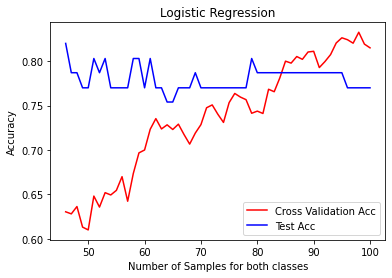

In [15]:
plt.plot(numList, log_cv, 'r')
plt.plot(numList, log_test, 'b')
plt.ylabel('Accuracy')
plt.xlabel('Number of Samples for both classes')
plt.legend(['Cross Validation Acc', 'Test Acc'])
plt.title("Logistic Regression")
plt.show()

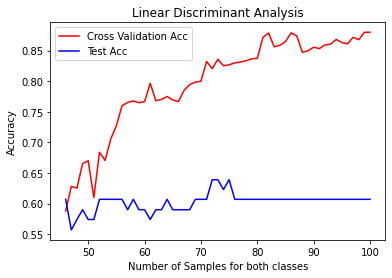

In [16]:
plt.plot(numList, lda_cv, 'r')
plt.plot(numList, lda_test, 'b')
plt.ylabel('Accuracy')
plt.xlabel('Number of Samples for both classes')
plt.legend(['Cross Validation Acc', 'Test Acc'])
plt.title("Linear Discriminant Analysis")
plt.show()

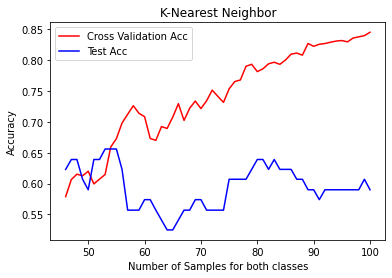

In [17]:
plt.plot(numList, knn_cv, 'r')
plt.plot(numList, knn_test, 'b')
plt.ylabel('Accuracy')
plt.xlabel('Number of Samples for both classes')
plt.legend(['Cross Validation Acc', 'Test Acc'])
plt.title("K-Nearest Neighbor")
plt.show()

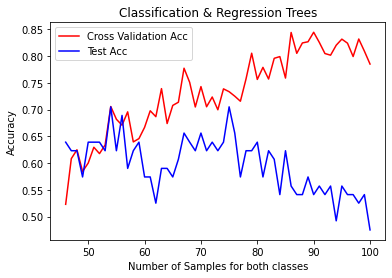

In [18]:
plt.plot(numList, cart_cv, 'r')
plt.plot(numList, cart_test, 'b')
plt.ylabel('Accuracy')
plt.xlabel('Number of Samples for both classes')
plt.legend(['Cross Validation Acc', 'Test Acc'])
plt.title("Classification & Regression Trees")
plt.show()

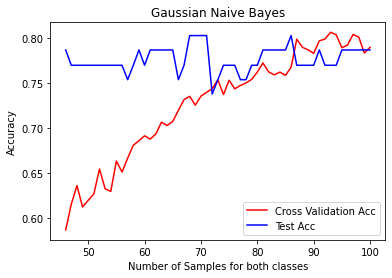

In [19]:
plt.plot(numList, gnb_cv, 'r')
plt.plot(numList, gnb_test, 'b')
plt.ylabel('Accuracy')
plt.xlabel('Number of Samples for both classes')
plt.legend(['Cross Validation Acc', 'Test Acc'])
plt.title("Gaussian Naive Bayes")
plt.show()

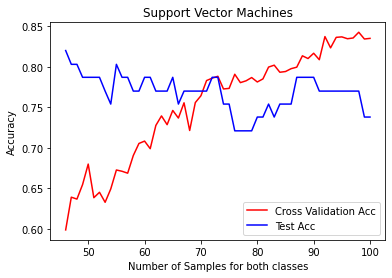

In [20]:
plt.plot(numList, svm_cv, 'r')
plt.plot(numList, svm_test, 'b')
plt.ylabel('Accuracy')
plt.xlabel('Number of Samples for both classes')
plt.legend(['Cross Validation Acc', 'Test Acc'])
plt.title("Support Vector Machines")
plt.show()

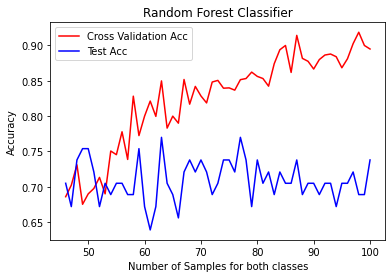

In [21]:
plt.plot(numList, rfc_cv, 'r')
plt.plot(numList, rfc_test, 'b')
plt.ylabel('Accuracy')
plt.xlabel('Number of Samples for both classes')
plt.legend(['Cross Validation Acc', 'Test Acc'])
plt.title("Random Forest Classifier")
plt.show()